In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.constants import c

datafile=pd.read_csv('Downloads/datafile.csv', sep=",")

In [2]:
datafile

,Event,ele_E,ele_Px,ele_Py,ele_Pz,pos_E,pos_Px,pos_Py,pos_Pz
0,0,91962.7,-21259.40,-22433.40,86613.60,36525.5,8271.760,34099.40,10145.30
1,1,267211.0,12886.50,60500.00,259953.00,122373.0,865.726,-30624.40,118476.00
2,2,79851.3,6823.22,49401.90,62362.90,38865.8,3582.750,-35408.90,15618.20
3,3,77850.1,-23164.90,16155.60,72546.70,30229.5,26264.700,1334.05,-14906.60
4,4,28483.8,27169.70,-4026.82,-7544.32,143216.0,-26110.400,6296.78,-140675.00
...,...,...,...,...,...,...,...,...,...
4995,4995,97404.8,3594.32,-63095.00,74120.20,42394.9,-7053.460,29846.70,29270.40
4996,4996,121148.0,5381.25,28135.80,117713.00,86457.2,-39344.300,-41373.60,64923.70
4997,4997,117579.0,27618.70,19040.60,-112692.00,82325.5,-42871.400,-11670.50,-69306.00
4998,4998,44178.9,24381.30,27594.50,-24410.40,53390.7,-25964.600,-34319.50,31600.30


In [3]:
def get_mother_mass(E1,P1x,P1y,P1z, E2,P2x,P2y,P2z,):
    mother_mass = (np.sqrt((((E1+E2)**2)-((P1x+P2x)**2)-((P1y+P2y)**2)-((P1z+P2z)**2))))/1000 
    return mother_mass
#divide by 1000 to get GeV

In [4]:
' ele_E' in datafile

True

In [5]:
datafile['mass_mother'] = datafile.apply(lambda x: get_mother_mass(x[' ele_E'], x[' ele_Px'], x[' ele_Py'], x[' ele_Pz'] ,x['  pos_E'],x[' pos_Px'],x[' pos_Py'],x[' pos_Pz']) ,axis=1)

In [6]:
print(datafile['mass_mother'])

0       82.717341
1       86.518841
2       87.798688
3       89.684571
4       86.634749
          ...    
4995    87.959791
4996    91.733455
4997    80.941793
4998    97.058744
4999    84.826934
Name: mass_mother, Length: 5000, dtype: float64


Text(0, 0.5, 'Number of events')

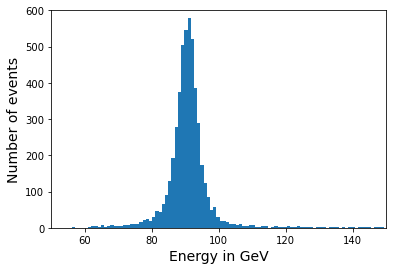

In [7]:
plt.hist(datafile['mass_mother'], bins = 400) #number of bins is approximately the square root of the total number n
plt.axis([50, 150, 0, 600])
plt.xlabel('Energy in GeV', fontsize=14)
plt.ylabel('Number of events', fontsize=14) #peaks around 90GeV

In [8]:
datafile_mean = datafile['mass_mother'].mean()
print(datafile_mean,'GeV')

91.6733333842235 GeV


In [9]:
def get_mother_momentum(P1x,P1y,P1z,P2x,P2y,P2z):
    mother_momentum = (np.sqrt(((P1x+P2x)**2)+((P1y+P2y)**2)+((P1z+P2z)**2)))/1000 
    return mother_momentum

In [10]:
datafile['momentum_mother'] = datafile.apply(lambda x: get_mother_momentum(x[' ele_Px'], x[' ele_Py'], x[' ele_Pz'] ,x[' pos_Px'],x[' pos_Py'],x[' pos_Pz']) ,axis=1)

In [11]:
print(datafile['momentum_mother'])

0        98.321204
1       379.855477
2        79.907072
3        60.314822
4       148.240486
           ...    
4995    108.660164
4996    186.238804
4997    182.784669
4998      9.971315
4999     12.877985
Name: momentum_mother, Length: 5000, dtype: float64


Text(0, 0.5, 'Number of events')

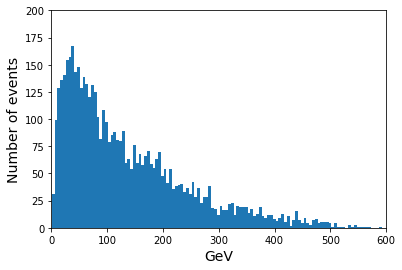

In [12]:
plt.hist(datafile['momentum_mother'], bins = 200) #number of bins is approximately the square root of the total number n
plt.axis([0, 600, 0, 200])
plt.xlabel('GeV', fontsize=14)
plt.ylabel('Number of events', fontsize=14) 

In [13]:
num_div = 1000
datafile['electron_E'] = (datafile[' ele_E']/num_div).round(2)

Text(0, 0.5, 'Number of events')

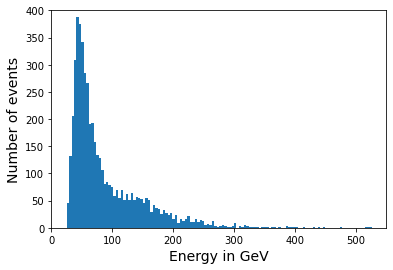

In [14]:
plt.hist(datafile['electron_E'], bins = 180)
plt.axis([0, 550, 0, 400])
plt.xlabel('Energy in GeV', fontsize=14)
plt.ylabel('Number of events', fontsize=14) 

In [15]:
datafile['rest_energy_decay']=datafile['mass_mother']**2/(2*datafile['mass_mother'])

Text(0, 0.5, 'Number of events')

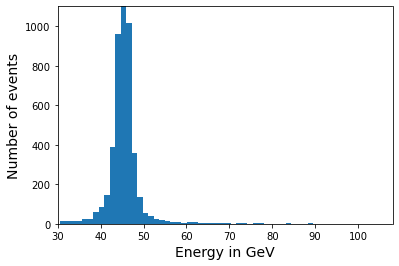

In [16]:
plt.hist(datafile['rest_energy_decay'], bins = 150)
plt.axis([30, 108, 0, 1100])
plt.xlabel('Energy in GeV', fontsize=14)
plt.ylabel('Number of events', fontsize=14) 

In [18]:
import sys
!{sys.executable} -m pip install nbconvert